<a href="https://colab.research.google.com/github/abdou-brahmia/Face-Recognition-in-Colab-Notebook/blob/main/TL_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
%%capture
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from collections import Counter
from google.colab import drive
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
import pdb
import re
import time
import timeit
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/dataset/Apt20_2015.csv'

# Read the CSV file into a DataFrame
all_df = pd.read_csv(file_path)

Mounted at /content/drive


In [9]:
# prompt: use the 2000 first item of df
# df = all_df.head(2000)
df= all_df.copy()

In [10]:

X = df['consumption'].values.reshape(-1, 1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [157]:
class TreeNode():
  def __init__(self):
    self.left = None
    self.right = None
    self.key=None

class LeafNode():
  def __init__(self):
    self.left=None
    self.right=None
    self.key=None
    self.data=[]
    self.consumption_range = None
    self.level = None
    self.timeRange= None


In [195]:
def Insert (c,pt,father):
  # print(c)
  # print(level(c))

  global p,root
  if p is None :
    p = LeafNode()
    p.data=c
    p.level=level(c)

  elif pt is None :
    pt = LeafNode()
    pt.data=c
    pt.level=level(c)

  else:
    if pt.level > level(c) :
      if pt.right is None:
        pt.right = LeafNode()
        pt.right.data=c
        pt.right.level=level(c)

      else:
        Insert(c,pt.right,True)
    elif pt.level < level(c) :
      # pdb.set_trace()
      if father == False:
        t = LeafNode()
        t.data=c
        t.level=level(c)
        t.left = p
        p = t
      else:
        t = TreeNode()
        t.left = root
        t.right = p
        root = t

        p=LeafNode()
        p.data=c
        p.level=level(c)
    elif pt.level == level(c) :  # 000
      t = TreeNode()
      t.left = root
      t.right = p
      root = t

      p=LeafNode()
      p.data=c
      p.level=level(c)


In [196]:
def get_consumption_level(input_value, consumption_ranges):
  for level, (start, end) in enumerate(consumption_ranges): # Iterate through consumption ranges to find the level
    if start <= input_value <= end:
      return level+1
  return -1      # If input doesn't match any level, return -1 or handle accordingly

def level(data):
  if data is not None:
    return get_consumption_level(data[0][0],consumption_ranges)
  else:
    return False

def add_to_cluster(input_value,date_time):
  if consumptionLevel <= len(consumption_ranges):    # Check if the input value falls within the specified consumption level
    start, end = consumption_ranges[consumptionLevel-1]
    if start <= input_value <= end:
      cluster.append((input_value,date_time) )     # If it does, add it to the last cluster with the current system time
      return True
  return False

timeRange = lambda cluster: (min((time for _, time in cluster), default=None), max((time for _, time in cluster), default=None))


In [197]:
root=None
p=None
leafTree=None
consumptionLevel=None
cntDataBotLevelTree=[]
consumption_ranges = [(0, 2.262134443),            # Low consumption
                      (2.262134444, 3.218437777),  # Moderate consumption
                      (3.218437778, 5.188594443),  # High consumption
                      (5.188594444, float('inf'))  # Very high consumption (no upper limit)
                      ]

cluster=[]

if __name__ == "__main__":

  dataToBeInserted=[
      ("2015-01-01 00:00","3.314261111"),("2015-01-01 00:15","2.32807"),("2015-01-01 00:30","2.029956667"),("2015-01-01 00:45","3.613077778"),("2015-01-01 01:00","6.751782222"),("2015-01-01 01:15","1.99021")
      ,("2015-01-01 01:30","3.212091111"),("2015-01-01 01:45","1.634281111"),("2015-01-01 02:00","1.865245556"),("2015-01-01 02:15","2.715622222"),("2015-01-01 02:30","2.174794444"),("2015-01-01 02:45","2.077188889")
      ,("2015-01-01 03:00","1.730263333"),("2015-01-01 03:15","2.472225556"),("2015-01-01 03:30","2.153677778"),("2015-01-01 03:45","2.121908889"),("2015-01-01 04:00","1.882377778"),("2015-01-01 04:15","1.765545556")
      ,("2015-01-01 04:30","2.233441111"),("2015-01-01 04:45","2.164094444"),("2015-01-01 05:00","1.683648889"),("2015-01-01 05:15","2.573188889"),("2015-01-01 05:30","2.289676667"),("2015-01-01 05:45","1.664597778")
      ,("2015-01-01 06:00","1.856214444"),("2015-01-01 06:15","2.321298889"),("2015-01-01 06:30","1.738966667"),("2015-01-01 06:45","2.496932222"),("2015-01-01 07:00","1.354098889"),("2015-01-01 07:15","2.108187778")
      ,("2015-01-01 07:30","2.149262222"),("2015-01-01 07:45","2.083576667"),("2015-01-01 08:00","2.008648889"),("2015-01-01 08:15","2.202224444"),("2015-01-01 08:30","1.671798889"),("2015-01-01 08:45","1.834645556")
      ,("2015-01-01 09:00","2.180925556"),("2015-01-01 09:15","1.878954444"),("2015-01-01 09:30","1.833906667"),("2015-01-01 09:45","3.305715556"),("2015-01-01 10:00","2.021498889"),("2015-01-01 10:15","1.610221111")
      ,("2015-01-01 10:30","2.159315556"),("2015-01-01 10:45","2.311312222"),("2015-01-01 11:00","1.56287"),("2015-01-01 11:15","2.122522222"),("2015-01-01 11:30","2.315494444"),("2015-01-01 11:45","1.771078889")
      ,("2015-01-01 12:00","3.973655556"),("2015-01-01 12:15","4.947998889"),("2015-01-01 12:30","3.06648"),("2015-01-01 12:45","2.548463333"),("2015-01-01 13:00","4.698215556"),("2015-01-01 13:15","3.359492222")
      ,("2015-01-01 13:30","1.861346667"),("2015-01-01 13:45","2.736235556"),("2015-01-01 14:00","2.043573333"),("2015-01-01 14:15","2.588803333"),("2015-01-01 14:30","2.352697778"),("2015-01-01 14:45","2.845913333")
      ,("2015-01-01 15:00","3.752213333"),("2015-01-01 15:15","2.847732222"),("2015-01-01 15:30","1.851998889"),("2015-01-01 15:45","2.876993333"),("2015-01-01 16:00","1.962302222"),("2015-01-01 16:15","2.911615556")
      ,("2015-01-01 16:30","1.801595556"),("2015-01-01 16:45","2.781727778"),("2015-01-01 17:00","2.010264444"),("2015-01-01 17:15","2.623134444"),("2015-01-01 17:30","2.185772222"),("2015-01-01 17:45","2.05806")
      ,("2015-01-01 18:00","2.830848889"),("2015-01-01 18:15","1.954064444"),("2015-01-01 18:30","2.913497778"),("2015-01-01 18:45","1.91469"),("2015-01-01 19:00","2.845478889"),("2015-01-01 19:15","2.0974")
      ,("2015-01-01 19:30","2.25873"),("2015-01-01 19:45","2.763965556"),("2015-01-01 20:00","2.08922"),("2015-01-01 20:15","2.572121111"),("2015-01-01 20:30","2.358494444"),("2015-01-01 20:45","2.867326667")
      ,("2015-01-01 21:00","2.743514444"),("2015-01-01 21:15","1.955302222"),("2015-01-01 21:30","3.576133333"),("2015-01-01 21:45","2.205018889"),("2015-01-01 22:00","2.535716667"),("2015-01-01 22:15","2.374104444")
      ,("2015-01-01 22:30","2.421791111"),("2015-01-01 22:45","2.562703333"),("2015-01-01 23:00","2.410865556"),("2015-01-01 23:15","2.513002222"),("2015-01-01 23:30","2.276505556"),("2015-01-01 23:45","2.304164444")
      ]

  for date,user_input in dataToBeInserted:
    user_input = float(user_input)
    # pdb.set_trace()
    if consumptionLevel==None:
      consumptionLevel =get_consumption_level(user_input,consumption_ranges)
      add_to_cluster(user_input,date)
    else:
      if add_to_cluster(user_input,date) == False:
        Insert (cluster,p,False)
        cluster=[]
        consumptionLevel =get_consumption_level(user_input,consumption_ranges)
        add_to_cluster(user_input,date)

  if cluster is not None :
    Insert (cluster,p,False)


In [198]:
level([[6.7517822]])

4

In [199]:
vars(root.left.left.left.left.left.left.right)

{'left': None,
 'right': <__main__.LeafNode at 0x7cebd01350f0>,
 'key': None,
 'data': [(2.781727778, '2015-01-01 16:45')],
 'consumption_range': None,
 'level': 2,
 'timeRange': None}

In [211]:
root=None
p=None
leafTree=None
consumptionLevel=None
cntDataBotLevelTree=[]
consumption_ranges = [(0, 2.262134443),            # Low consumption
                      (2.262134444, 3.218437777),  # Moderate consumption
                      (3.218437778, 5.188594443),  # High consumption
                      (5.188594444, float('inf'))  # Very high consumption (no upper limit)
                      ]

cluster=[]

if __name__ == "__main__":
  df=all_df.copy()
  df=df[:5000]
  print(f"Length of DataFrame: {len(df)}")

  for index, row in df.iterrows():
    # pdb.set_trace()
    user_input = float(row['consumption'])
    # pdb.set_trace()
    if consumptionLevel==None:
      lastCluster=[]
      consumptionLevel =get_consumption_level(user_input,consumption_ranges)
      add_to_cluster(user_input,date)
    else:
      if add_to_cluster(user_input,date) == False:
        Insert (cluster,p,False)
        cluster=[]
        consumptionLevel =get_consumption_level(user_input,consumption_ranges)
        add_to_cluster(user_input,date)

  if cluster is not None :
    Insert (cluster,p,False)

Length of DataFrame: 5000


# Test

In [212]:
# Function to count the total number of data points in a tree
def countDataPointInTree(tree):
  cnt=0 # Initialize the count variable
  if isinstance(tree, TreeNode):
    if tree.left is not None:  # Recursively count data points in the left subtree if exist
      cnt+=countDataPointInTree (tree.left)
    if tree.right is not None:  # Recursively count data points in the right subtree if exist
      cnt+=countDataPointInTree (tree.right)
  else:
    # Add the count to the total count
    cnt+= len(tree.data) # Count the number of data points in the node
    if tree.left is not None:
      cnt+=countDataPointInTree (tree.left)
    if tree.right is not None:
      cnt+=countDataPointInTree (tree.right)


  # Uncomment the following line if you want to print the count for each tree "dont recomended"
  # print(f"Counted {cnt} data points in tree with level {tree.level}")
  return cnt



def countTotalNode(tree):
  cnt=1 # Initialize the count variable
  if tree.left is not None:
    cnt+=countTotalNode (tree.left)
  if tree.right is not None:
    cnt+=countTotalNode (tree.right)
  return cnt

def countArtificialNode(tree):
  return countTotalNode(tree)-countRealNode(tree)

def countRealNode(tree):
  cnt=0 # Initialize the count variable
  if isinstance(tree, TreeNode):
    if tree.left is not None:
      cnt+=countRealNode (tree.left)
    if tree.right is not None:
      cnt+=countRealNode (tree.right)
  else:
    cnt+=1
    if tree.left is not None:
      cnt +=countRealNode(tree.left)
    if tree.right is not None:
      cnt +=countRealNode(tree.right)
  return cnt

def count_clusters_in_each_leaf(tree):
  cnt=0 # Initialize the count variable
  global cntDataBotLevelTree
  if isinstance(tree, TreeNode):

    if tree.left is not None: # Recursively count clusters in the left subtree if exist
      cnt=count_clusters_in_each_leaf (tree.left)
      if isinstance(tree.left, LeafNode):
        cntDataBotLevelTree.append(cnt)
    if tree.right is not None:  # Recursively count clusters in the right subtree if exist
      cnt=count_clusters_in_each_leaf (tree.right)
      if isinstance(tree.right, LeafNode):
        cntDataBotLevelTree.append(cnt)
  else:
    cnt+=1
    if tree.left is not None:
      cnt+=count_clusters_in_each_leaf (tree.left)
    if tree.right is not None:
      cnt+=count_clusters_in_each_leaf (tree.right)

  # Uncomment the following line if you want to print the count for each tree "dont recomended"
  # print(f"Counted {cnt} data points in tree with level {tree.level}")
  return cnt



In [213]:
total_count=countDataPointInTree(root)
print(f"Total data points = {total_count}")

var_count_total_node=countTotalNode(root)
print(f"Total Node = {var_count_total_node}")

var_count_artificial_node=countArtificialNode(root)
print(f"Artificial Node = {var_count_artificial_node}")

var_count_real_node=countRealNode(root)
print(f"Real Node = {var_count_real_node}")


Total data points = 4999
Total Node = 3135
Artificial Node = 922
Real Node = 2213


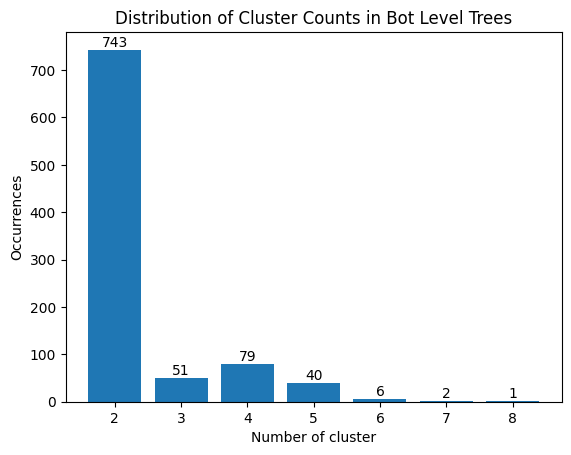

In [214]:
cntDataBotLevelTree=[]
count_clusters_in_each_leaf(root)

counter = Counter(cntDataBotLevelTree) # Count occurrences of each number
numbers = list(counter.keys())# Separate data for plotting
occurrences = list(counter.values())
plt.bar(numbers, occurrences) # Plotting the bar diagram

# Display the number of occurrences above each bar
for num, occ in zip(numbers, occurrences):
  plt.text(num, occ + 0.1, str(occ), ha='center', va='bottom')

plt.title('Distribution of Cluster Counts in Bot Level Trees')
plt.xlabel('Number of cluster')
plt.ylabel('Occurrences')
plt.xticks(numbers)
plt.show()